## 一、	数据集
#### 选用的数据集为Trending YouTube Video Statistics中的FRvideos.csv。

## 二、	要求
#### 1、对数据集进行处理，转换成适合关联规则挖掘的形式；
#### 2、找出频繁项集；
#### 3、导出关联规则，计算其支持度和置信度；
#### 4、对规则进行评价，可使用Lift及其他指标；
#### 5、对挖掘结果进行可视化展示。


## 对数据集进行处理，转换成适合关联规则挖掘的形式

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

color = sns.color_palette()
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

datafile = pd.read_csv('E://DataMining/FRvideos.csv')
datafile.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
5,teXaL6GdQRk,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",141253,14354,202,417,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...
6,nduL7G_gJoY,17.14.11,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,2017-11-12T19:00:08.000Z,"fantome""|""esprits""|""spiritisme""|""hanté""|""ouija...",187654,9286,1381,2419,https://i.ytimg.com/vi/nduL7G_gJoY/default.jpg,False,False,False,"Bonsoir à tous, \nJe tenais beaucoup à retourn..."
7,QmpWE_SODZA,17.14.11,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,2017-11-13T17:30:01.000Z,"salut les terriens""|""squeezie""|""jeux videos""|""...",91051,1674,1903,701,https://i.ytimg.com/vi/QmpWE_SODZA/default.jpg,False,False,False,"Dans Salut Les Terriens, Thierry Ardisson, reç..."
8,GBVxEpQr8R8,17.14.11,ON VOUS DÉVOILE NOTRE VRAI SALAIRE,Mcfly & Carlito,24,2017-11-12T08:59:25.000Z,"mcfly""|""carlito""|""golden moustache""|""fatshow""|...",2340941,200598,6018,7575,https://i.ytimg.com/vi/GBVxEpQr8R8/default.jpg,False,False,False,Nouvelle vidéo tous les dimanches matins 10h. ...
9,0RFhWyM6qbA,17.14.11,Benzema balance ses dur vérités Deschamps et L...,HALIRIPA,22,2017-11-12T20:16:45.000Z,"Karim benzema football""|""Benzema vs cristiano ...",635236,5945,722,1483,https://i.ytimg.com/vi/0RFhWyM6qbA/default.jpg,False,False,False,Abonnez-vous et partagez au max la famille


In [2]:
datafile.drop(datafile.columns[0], axis=1, inplace=True)
datafile

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
5,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",141253,14354,202,417,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...
6,17.14.11,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,2017-11-12T19:00:08.000Z,"fantome""|""esprits""|""spiritisme""|""hanté""|""ouija...",187654,9286,1381,2419,https://i.ytimg.com/vi/nduL7G_gJoY/default.jpg,False,False,False,"Bonsoir à tous, \nJe tenais beaucoup à retourn..."
7,17.14.11,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,2017-11-13T17:30:01.000Z,"salut les terriens""|""squeezie""|""jeux videos""|""...",91051,1674,1903,701,https://i.ytimg.com/vi/QmpWE_SODZA/default.jpg,False,False,False,"Dans Salut Les Terriens, Thierry Ardisson, reç..."
8,17.14.11,ON VOUS DÉVOILE NOTRE VRAI SALAIRE,Mcfly & Carlito,24,2017-11-12T08:59:25.000Z,"mcfly""|""carlito""|""golden moustache""|""fatshow""|...",2340941,200598,6018,7575,https://i.ytimg.com/vi/GBVxEpQr8R8/default.jpg,False,False,False,Nouvelle vidéo tous les dimanches matins 10h. ...
9,17.14.11,Benzema balance ses dur vérités Deschamps et L...,HALIRIPA,22,2017-11-12T20:16:45.000Z,"Karim benzema football""|""Benzema vs cristiano ...",635236,5945,722,1483,https://i.ytimg.com/vi/0RFhWyM6qbA/default.jpg,False,False,False,Abonnez-vous et partagez au max la famille


In [3]:
columns = ['trending_date', 'channel_title', 'category_id', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
for column in columns:
    print(datafile[column].value_counts())
    print('-' * 66)

17.15.12    200
18.06.01    200
17.21.11    200
18.11.06    200
18.11.05    200
17.07.12    200
18.24.03    200
18.01.02    200
17.01.12    200
18.09.01    200
18.29.05    200
18.09.05    200
18.10.03    200
18.08.06    200
17.28.12    200
17.30.12    200
18.24.05    200
18.27.04    200
18.16.01    200
17.22.12    200
18.29.01    200
18.31.05    200
18.25.05    200
17.17.12    200
18.17.01    200
18.13.05    200
18.04.01    200
18.15.04    200
18.10.05    200
17.06.12    200
           ... 
18.03.04    198
18.01.04    198
18.31.01    198
18.21.05    197
18.12.02    197
18.26.03    197
18.05.02    197
18.19.05    197
18.13.02    197
18.14.05    197
18.07.04    197
18.15.03    197
18.16.05    196
18.01.03    196
18.23.03    196
18.13.03    196
18.15.02    196
18.27.03    196
18.11.02    196
18.14.02    195
18.25.04    195
18.24.02    195
18.14.03    195
18.16.02    195
18.23.05    193
18.06.06    190
18.13.06    188
18.20.05    175
18.17.05    168
18.10.06    168
Name: trending_date, Len

In [4]:
datafile.describe()

,category_id,views,likes,dislikes,comment_count
count,40724.000,40724.000,40724.000,40724.000,40724.000
mean,20.124,419921.851,17388.864,814.962,1832.453
std,6.984,1772129.644,87205.088,11392.194,14043.213
min,1.000,223.000,0.000,0.000,0.000
25%,17.000,16974.500,338.000,18.000,56.000
50%,23.000,73721.000,1892.500,83.000,235.000
75%,24.000,270808.750,7969.500,335.000,841.000
max,44.000,100911567.000,4750254.000,1353661.000,1040912.000


由于数据集中views、likes、dislikes、comment_count为连续特征，因此将他们改为类别变量，这里取各个标签的平均数为标准，根据这四个变量的数值分布情况，规定观看数views低于419921次为低访问，高于419921次为高访问。
喜欢数likes低于17388为一般视频，高于17388为受喜爱视频。
不喜欢数dislikes低于814为一般视频，高于814为不受喜爱视频。
评论数comment_count低于1832为低评论视频，高于1832为高评论视频。

In [5]:
datafile['high_views'] = datafile['views'].apply(lambda x:1 if x > 419921 else 0 )
datafile['low_views'] = datafile['views'].apply(lambda x: 1 if x <= 419921 else 0)

datafile['high_likes'] = datafile['likes'].apply(lambda x:1 if x > 17388 else 0 )
datafile['low_likes'] = datafile['likes'].apply(lambda x: 1 if x <= 17388 else 0)

datafile['high_dislikes'] = datafile['dislikes'].apply(lambda x:1 if x > 814 else 0 )
datafile['low_dislikes'] = datafile['dislikes'].apply(lambda x: 1 if x <= 814 else 0)

datafile['high_comment_count'] = datafile['comment_count'].apply(lambda x:1 if x > 1832 else 0 )
datafile['low_comment_count'] = datafile['comment_count'].apply(lambda x: 1 if x <= 1832 else 0)

datafile.head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,video_error_or_removed,description,high_views,low_views,high_likes,low_likes,high_dislikes,low_dislikes,high_comment_count,low_comment_count
0,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,...,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,0,1,1,0,1,0,1,0
1,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,...,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,1,0,0,1,0,1,0,1
2,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,...,False,Une nouvelle dose de dessins animés français e...,1,0,1,0,0,1,1,0
3,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,...,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",1,0,1,0,0,1,1,0
4,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,...,False,Sauts à plus de 4 mètres de haut dans un tramp...,0,1,0,1,0,1,0,1
5,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",141253,14354,202,417,...,False,Contenu commandité par Netflix France.\nInspir...,0,1,0,1,0,1,0,1
6,17.14.11,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,2017-11-12T19:00:08.000Z,"fantome""|""esprits""|""spiritisme""|""hanté""|""ouija...",187654,9286,1381,2419,...,False,"Bonsoir à tous, \nJe tenais beaucoup à retourn...",0,1,0,1,1,0,1,0
7,17.14.11,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,2017-11-13T17:30:01.000Z,"salut les terriens""|""squeezie""|""jeux videos""|""...",91051,1674,1903,701,...,False,"Dans Salut Les Terriens, Thierry Ardisson, reç...",0,1,0,1,1,0,0,1
8,17.14.11,ON VOUS DÉVOILE NOTRE VRAI SALAIRE,Mcfly & Carlito,24,2017-11-12T08:59:25.000Z,"mcfly""|""carlito""|""golden moustache""|""fatshow""|...",2340941,200598,6018,7575,...,False,Nouvelle vidéo tous les dimanches matins 10h. ...,1,0,1,0,1,0,1,0
9,17.14.11,Benzema balance ses dur vérités Deschamps et L...,HALIRIPA,22,2017-11-12T20:16:45.000Z,"Karim benzema football""|""Benzema vs cristiano ...",635236,5945,722,1483,...,False,Abonnez-vous et partagez au max la famille,1,0,0,1,0,1,0,1


将分类编号category_id定义为类别特征。
并对分类编号进行one-hot编码

In [6]:
datafile['category_id'] = datafile['category_id'].apply(str)
new_datafile = datafile['category_id']
new_datafile = pd.get_dummies(new_datafile)

# new_datafile = pd.DataFrame()

将编号分类信息与访问数、喜欢数、不喜欢数和评论数拼成一个新的数据集，打印表格查看数据情况。

In [7]:
new_datafile['high_views'] = datafile['high_views']
new_datafile['low_views'] = datafile['low_views']
new_datafile['high_likes'] = datafile['high_likes']
new_datafile['low_likes'] = datafile['low_likes']
new_datafile['high_dislikes'] = datafile['high_dislikes']
new_datafile['low_dislikes'] = datafile['low_dislikes']
new_datafile['high_comment_count'] = datafile['high_comment_count']
new_datafile['low_comment_count'] = datafile['low_comment_count']

new_datafile.head(10)

,1,10,15,17,19,2,20,22,23,24,...,43,44,high_views,low_views,high_likes,low_likes,high_dislikes,low_dislikes,high_comment_count,low_comment_count
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,1,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
8,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1


In [8]:
list(new_datafile.columns.values)

['1',
 '10',
 '15',
 '17',
 '19',
 '2',
 '20',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '43',
 '44',
 'high_views',
 'low_views',
 'high_likes',
 'low_likes',
 'high_dislikes',
 'low_dislikes',
 'high_comment_count',
 'low_comment_count']

## 进行剪枝，找出频繁项并导出关联规则
Lift支持度，也叫做提升度，它是可信度与期望可信度的比值，能反映关联规则中的相关性。提升度是可信度与期望可信度的比值，提升度大于1表示正相关，小于1表示负相关，等于1表示不相关。lift评价可以弥补置信度、支持度自身的不足，使得评价更为合理。利用这个值可以对关键规则进行排序，在一定程度上也是一个规则优化挑选的过程。

In [9]:
def getTransaction(full_item, bool_item):
    ret = []
    for i in range(len(full_item)):
        if bool_item[i] == 1:
            ret.append(full_item[i])
    return ret

def preProcess():
    ret = []
    attr = list(new_datafile.columns.values)
    for i in range(len(new_datafile)):
        trans = getTransaction(attr, new_datafile.loc[i])
        ret.append(trans)
    return ret

def create_C1(data_set):
    C1 = set()
    for t in data_set:
        for item in t:
            item_set = frozenset([item])
            C1.add(item_set)
    return C1


def is_apriori(Ck_item, Lksub1):
    for item in Ck_item:
        sub_Ck = Ck_item - frozenset([item])
        if sub_Ck not in Lksub1:
            return False
    return True


def create_Ck(Lksub1, k):
    Ck = set()
    len_Lksub1 = len(Lksub1)
    list_Lksub1 = list(Lksub1)
    for i in range(len_Lksub1):
        for j in range(1, len_Lksub1):
            l1 = list(list_Lksub1[i])
            l2 = list(list_Lksub1[j])
            l1.sort()
            l2.sort()
            if l1[0:k-2] == l2[0:k-2]:
                Ck_item = list_Lksub1[i] | list_Lksub1[j]
                # pruning
                if is_apriori(Ck_item, Lksub1):
                    Ck.add(Ck_item)
    return Ck


def generate_Lk_by_Ck(data_set, Ck, min_support, support_data):
    Lk = set()
    item_count = {}
    for t in data_set:
        for item in Ck:
            if item.issubset(t):
                if item not in item_count:
                    item_count[item] = 1
                else:
                    item_count[item] += 1
    t_num = float(len(data_set))
    for item in item_count:
        if (item_count[item] / t_num) >= min_support:
            Lk.add(item)
            support_data[item] = item_count[item] / t_num
    return Lk


def generate_L(data_set, k, min_support):
    support_data = {}
    C1 = create_C1(data_set)
    L1 = generate_Lk_by_Ck(data_set, C1, min_support, support_data)
    Lksub1 = L1.copy()
    L = []
    L.append(Lksub1)
    for i in range(2, k+1):
        Ci = create_Ck(Lksub1, i)
        Li = generate_Lk_by_Ck(data_set, Ci, min_support, support_data)
        Lksub1 = Li.copy()
        L.append(Lksub1)
    return L, support_data


def generate_big_rules(L, support_data, min_conf, min_support):
    big_rule_list = []
    sub_set_list = []
    for i in range(0, len(L)):
    #i -> i# 项集
        for freq_set in L[i]:
            #freq_set -> i项集中的每个元素
            for sub_set in sub_set_list:
                if sub_set.issubset(freq_set):
                    conf = support_data[freq_set] / support_data[freq_set - sub_set]
                    sup = support_data[freq_set]
                    lift = conf / support_data[sub_set]
                    big_rule = (freq_set - sub_set, sub_set, conf, sup, lift)
                    if conf >= min_conf and sup >= min_support and big_rule not in big_rule_list:
                        # print freq_set-sub_set, " => ", sub_set, "conf: ", conf
                        big_rule_list.append(big_rule)
            # l1中的每个元素都在其中
            sub_set_list.append(freq_set)
    return big_rule_list
import matplotlib.pyplot as plt

def plot_bar(rules, data, title):
    plt.title(title)
    plt.xticks(range(len(data)),rules,rotation=90)
    plt.bar(range(len(data)), data, color = 'B')
    # plt.savefig('figures\\'+title+'.png')
    plt.show()

def visualization(big_rule_list):
    rules = []
    conf = []
    support = []
    lift = []
    for i in range(len(big_rule_list)):
        rule = "{}=>{}".format(list(big_rules_list[i][0]), list(big_rules_list[i][1]))
        rules.append(rule)
        conf.append(big_rule_list[i][2])
        support.append(big_rule_list[i][3])
        lift.append(big_rule_list[i][4])
    plot_bar(rules, support, 'rule-support figure')
    plot_bar(rules, conf, 'rule-confidence figure')
    plot_bar(rules, lift, 'rule-lift figure')

In [10]:
data_set = preProcess()

## 数据可视化

--------------------------------------------------
frequent 1-itemsets		support
--------------------------------------------------
frozenset({'low_likes'}) 0.8476082899518711
frozenset({'low_comment_count'}) 0.8646252823887633
frozenset({'24'}) 0.24111089283960319
frozenset({'low_dislikes'}) 0.8733179451920243
frozenset({'low_views'}) 0.8197131912385817
--------------------------------------------------
frequent 2-itemsets		support
--------------------------------------------------
frozenset({'low_comment_count', '24'}) 0.21142323936744917
frozenset({'low_likes', 'low_views'}) 0.7807926529810432
frozenset({'low_dislikes', 'low_likes'}) 0.8114870837835183
frozenset({'low_dislikes', '24'}) 0.21228268342991846
frozenset({'low_dislikes', 'low_comment_count'}) 0.8250908555151754
frozenset({'low_likes', '24'}) 0.21301934976917788
frozenset({'low_comment_count', 'low_views'}) 0.7864895393379825
frozenset({'low_dislikes', 'low_views'}) 0.7986936450250467
frozenset({'low_comment_count', 'low_li

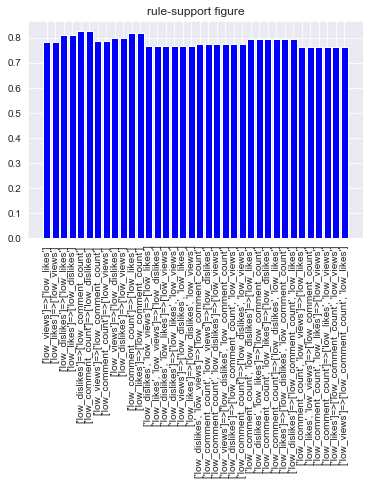

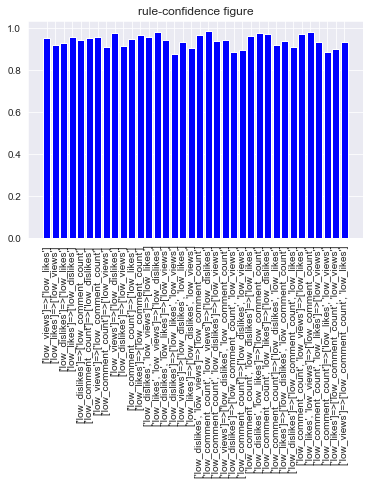

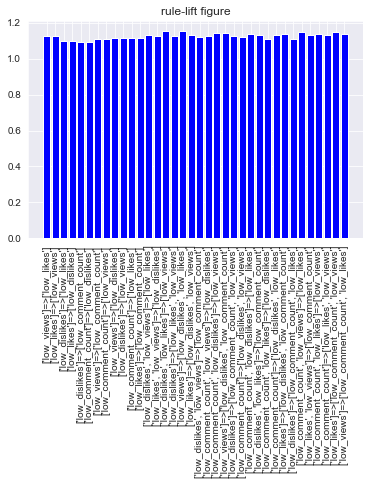

In [11]:
L, support_data = generate_L(data_set, k=3, min_support=0.2)
#big_rules_list是一个列表，列表的元素是元组->(规则条件，规则结果，置信度)
big_rules_list = generate_big_rules(L, support_data, min_conf=0.7, min_support=0.3)
# L is a list with sets element,
for Lk in L:
    print ("-"*50)
    print ("frequent " + str(len(list(Lk)[0])) + "-itemsets\t\tsupport")
    print ("-"*50)
    for freq_set in Lk:
        print (freq_set, support_data[freq_set])
print()
print ("Big Rules is: ")
print('-' * 50)
for item in big_rules_list:
    print("{}=>{}, confidence: {:.2f}, support: {:.2f}, lift: {:.3f}".format(list(item[0]), list(item[1]), item[2], item[3], item[4]))
visualization(big_rules_list)

从剪枝结果来看，得到的频繁项为“low_likes”、“low_comment_count”、“24”、“low_views”、“low_dislikes”

从上图可以看出，规则的支持度、置信度都比较高，说明观看次数、低喜欢度、低不喜欢度、低评论数这4个特征之间的关联较大。从规则提升度可以发现，最高规则提升度的规则为['low_comment_count', 'low_views']=>['low_likes']和['low_likes']=>['low_comment_count', 'low_views']，这说明当视频的评论和观看次数较少时，视频的人气就比较小，不容易受到用户的喜爱，同时，用户喜爱少的视频，它的评论和观看次数自然也少。